In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

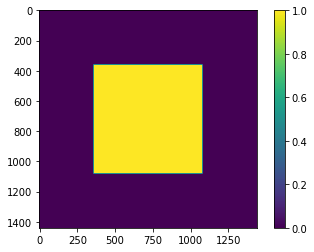

In [2]:
img_inv= np.loadtxt("a.txt",delimiter=',',dtype='complex')
img_inv=np.pad(img_inv,(360,360),'constant', constant_values=(0, 0))

plt.figure()
plt.imshow(np.abs(img_inv)**2)
plt.colorbar()
plt.show()

In [3]:
np.shape(img_inv)

(1440, 1440)

In [4]:
um=1e-6
mm=1e-3
nm=1e-9


In [5]:
bias=0
NAob=0.8
wave=500*nm
m0=2*NAob/wave
shear=1/(m0)
shear

3.125e-07

In [6]:
1/(720)


0.001388888888888889

In [7]:
deltafx=1/(720*(1/m0))
deltafy=deltafx
deltafx
#deltafx=50000
#deltafy=deltafx

4444.444444444444

In [8]:
r=m0/(deltafx)


In [9]:
 T=np.fft.fftshift(np.fft.fft2(img_inv )) 

In [10]:
%matplotlib qt

In [11]:
def Tfunsin(deltafx,deltafy,m,n,shear,bias):
    centerx=int(m/2)
    centery=int(n/2)
    
    x=np.arange(-centerx,centerx)
    y=np.arange(-centery,centery)
    
    X1, Y1= np.meshgrid(x,y)
    
    X1=X1*deltafx
    Y1=Y1*deltafy
    
    tsin=-1j*np.sin(2*np.pi*shear*X1-bias)
    return tsin

In [12]:
trans=Tfunsin(deltafy,deltafx,1440,1440,shear,bias)
plt.figure()
plt.imshow(np.abs(trans))
plt.colorbar()
plt.show()

In [13]:
np.shape(trans)

(1440, 1440)

In [14]:
def pupile(n,m,r):
    mascara=np.zeros((n,m))
    cv.circle(mascara,(int(n/2), int(m/2)),int(r),1,-1)
    return mascara

In [15]:
pupile1=pupile(1440,1440,r)
plt.figure()
plt.imshow(np.abs(pupile1)**2)
plt.colorbar()
plt.show()

In [16]:
espectro=T*trans*pupile1

In [17]:
img=np.fft.ifft2(espectro)

In [18]:
plt.figure()
plt.imshow(np.abs(img)**2)
plt.colorbar()
plt.show()

In [19]:
pupilecond=pupile(1440,1440,360)

In [20]:
pupile2=np.fft.fftshift(np.fft.fft2(pupile1))
pupile2c=np.fft.fftshift(np.conjugate(np.fft.fft2(pupile1)))


In [21]:
pupile3=pupile(1440,1440,500)
pupile3=np.fft.fftshift(np.fft.fft2(pupile3))
pupile3c=np.fft.fftshift(np.conjugate(np.fft.fft2(pupile3)))
pupile4=(pupile3*pupile2)*(pupile3c*pupile2c)#*np.conj(pupile3*pupile2)
                       

In [22]:
pupile40=(pupile2**2)*(pupile3**2)

In [23]:
espectro2=T*trans*pupile4

In [24]:
img2=np.fft.ifft2(espectro2)
plt.figure()
plt.imshow(np.abs(img)**2)
plt.colorbar()
plt.show()